# Feature engineering of the titanic data set

Data source: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("../data/train.csv", index_col=0)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Overview

<AxesSubplot:ylabel='PassengerId'>

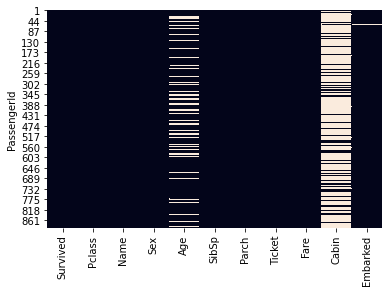

In [5]:
sns.heatmap(df.isna(), cbar = False)

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Manually select columns/features and drop NaNs

In [48]:
df_original = pd.DataFrame(df) # keep (deep) copy of original Data

In [49]:
df.drop(['Cabin', 'Name'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S


## Transformations

Create a few ColumnTransformers and train them on the Titanic data. Here are a few ideas to work on:
* impute the missing values in the **Age** column
* one-hot-encode the **Embarked** column
* bin the imputed **Age** column into 3 bins (young, middle-aged, old)
* scale the **Fare** column

How to combine _Pipeline_ and _ColumnTransformer_: https://youtu.be/HK9keM3lre4?t=395

In [100]:
preprocessor = make_column_transformer(
     [ SimpleImputer(missing_values=np.nan, strategy='mean') , ['Age'] ]
    ,[ OneHotEncoder(), ['Sex'] ]
    ,[ make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder()) , ['Embarked'] ]
    ,[ make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),KBinsDiscretizer(n_bins=3)) , ['Age'] ]
    ,[ StandardScaler() , ['Fare'] ]
    #,remainder='passthrough'
)

In [101]:
dd = preprocessor.fit_transform(df)

In [102]:
dd[0:3]

array([[22.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        , -0.50244517],
       [38.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.78684529],
       [26.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        , -0.48885426]])

<AxesSubplot:>

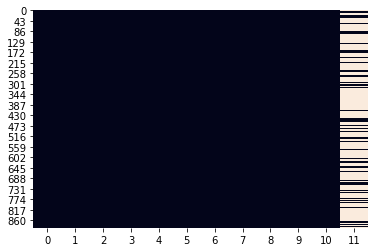

In [77]:
sns.heatmap(pd.DataFrame(dd).isna(), cbar = False)

In [78]:
np.count_nonzero(np.isnan(dd))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''